# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_AccessByKAI_1.csv")
df.head()

,userName,score,at,content
0,Johana Yuan,5,2024-05-06 02:57:10,Pesan tiket no ribet no antri....
1,A. Asyariyanto,5,2024-05-06 02:18:14,Mantap
2,Yuriko Oktareza,1,2024-05-06 01:14:29,Senin 6/05/2024.sekitar pukul 03:00 sya bli pu...
3,Lalamiauw official,1,2024-05-06 00:43:07,Kenapa tiket go show sekarang tidak bisa dibel...
4,Rista Nur Alifiyah,1,2024-05-05 23:33:37,Ngisi saldo disini uda kena admin di e wallet ...


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Pesan tiket no ribet no antri....,Johana Yuan,2024-05-06 02:57:10
1,Mantap,A. Asyariyanto,2024-05-06 02:18:14
2,Senin 6/05/2024.sekitar pukul 03:00 sya bli pu...,Yuriko Oktareza,2024-05-06 01:14:29
3,Kenapa tiket go show sekarang tidak bisa dibel...,Lalamiauw official,2024-05-06 00:43:07
4,Ngisi saldo disini uda kena admin di e wallet ...,Rista Nur Alifiyah,2024-05-05 23:33:37
...,...,...,...
791,Pengembalian uang pembatalan sangat lama kocak...,Ruhyatna 2716,2024-04-17 14:40:15
792,untuk pengecekan POSISI KERETA KRL di stasiun ...,Darmawan Sugiarto,2024-04-17 14:20:28
793,Apklikasinya sekarang udah nyaman bangeet mesk...,Neviratujulian Mentari,2024-04-17 13:35:04
794,JADWAL DELAY KERETA NYA GA NGOTAK ANJINGGG,Nur Halimah,2024-04-17 12:44:21


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   796 non-null    object
 1   userName  796 non-null    object
 2   at        796 non-null    object
dtypes: object(3)
memory usage: 18.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,796,796,796
unique,783,796,795
top,Mantap,Johana Yuan,2024-04-20 03:40:25
freq,7,1,2


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(796, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(783, 3)

In [16]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [17]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [18]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,pesan tiket no ribet no antri,Johana Yuan,2024-05-06 02:57:10
1,mantap,A. Asyariyanto,2024-05-06 02:18:14
2,senin sekitar pukul sya bli pulsa lewat aplik...,Yuriko Oktareza,2024-05-06 01:14:29
3,kenapa tiket go show sekarang tidak bisa dibel...,Lalamiauw official,2024-05-06 00:43:07
4,ngisi saldo disini uda kena admin di e wallet ...,Rista Nur Alifiyah,2024-05-05 23:33:37
...,...,...,...
791,pengembalian uang pembatalan sangat lama kocak...,Ruhyatna 2716,2024-04-17 14:40:15
792,untuk pengecekan posisi kereta krl di stasiun ...,Darmawan Sugiarto,2024-04-17 14:20:28
793,apklikasinya sekarang udah nyaman bangeet mesk...,Neviratujulian Mentari,2024-04-17 13:35:04
794,jadwal delay kereta nya ga ngotak anjinggg,Nur Halimah,2024-04-17 12:44:21


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [19]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,pesan tiket no ribet no antri,Johana Yuan,2024-05-06 02:57:10
1,mantap,A. Asyariyanto,2024-05-06 02:18:14
2,senin sekitar pukul sya bli pulsa lewat aplik...,Yuriko Oktareza,2024-05-06 01:14:29
3,kenapa tiket go show sekarang tidak bisa dibel...,Lalamiauw official,2024-05-06 00:43:07
4,ngisi saldo disini uda kena admin di e wallet ...,Rista Nur Alifiyah,2024-05-05 23:33:37
...,...,...,...
791,pengembalian uang pembatalan sangat lama kocak...,Ruhyatna 2716,2024-04-17 14:40:15
792,untuk pengecekan posisi kereta krl di stasiun ...,Darmawan Sugiarto,2024-04-17 14:20:28
793,aplikasilikasinya sekarang udah nyaman bangeet...,Neviratujulian Mentari,2024-04-17 13:35:04
794,jadwal delay kereta nya ga ngotak anjinggg,Nur Halimah,2024-04-17 12:44:21


In [20]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


In [21]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,pesan tiket no ribet no antri,Johana Yuan,2024-05-06 02:57:10
1,mantap,A. Asyariyanto,2024-05-06 02:18:14
2,senin pukul sya bli pulsa lewat aplikasi kai ...,Yuriko Oktareza,2024-05-06 01:14:29
3,tiket go show sekarang dibeli lewat aplikasi p...,Lalamiauw official,2024-05-06 00:43:07
4,ngisi saldo disini uda kena admin e wallet tp ...,Rista Nur Alifiyah,2024-05-05 23:33:37
...,...,...,...
791,pengembalian uang pembatalan sangat lama kocak...,Ruhyatna 2716,2024-04-17 14:40:15
792,pengecekan posisi kereta krl stasiun bekasitim...,Darmawan Sugiarto,2024-04-17 14:20:28
793,aplikasilikasinya sekarang udah nyaman bangeet...,Neviratujulian Mentari,2024-04-17 13:35:04
794,jadwal delay kereta nya ga ngotak anjinggg,Nur Halimah,2024-04-17 12:44:21


In [22]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                   [pesan, tiket, no, ribet, no, antri]
1                                               [mantap]
2      [senin, pukul, sya, bli, pulsa, lewat, aplikas...
3      [tiket, go, show, sekarang, dibeli, lewat, apl...
4      [ngisi, saldo, disini, uda, kena, admin, e, wa...
                             ...                        
791    [pengembalian, uang, pembatalan, sangat, lama,...
792    [pengecekan, posisi, kereta, krl, stasiun, bek...
793    [aplikasilikasinya, sekarang, udah, nyaman, ba...
794    [jadwal, delay, kereta, nya, ga, ngotak, anjin...
795                                           [nyusahin]
Name: content, Length: 783, dtype: object

In [23]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_AccessByKAI_1.csv', index = False)


In [25]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_AccessByKAI_1.csv', encoding = 'latin1')
df_clean

,content
0,pesan tiket no ribet no antri
1,mantap
2,senin pukul sya bli pulsa lewat aplikasi kai a...
3,tiket go show sekarang beli lewat aplikasi pad...
4,ngisi saldo sini uda kena admin e wallet tp sa...
...,...
778,kembali uang batal sangat lama kocak sekali da...
779,kece posisi kereta krl stasiun bekasitimur bis...
780,aplikasilikasinya sekarang udah nyaman bangeet...
781,jadwal delay kereta nya ga ngotak anjinggg


# **Translate**

In [26]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [27]:
import pandas as pd
from easynmt import EasyNMT

In [28]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_AccessByKAI_1.csv', encoding='latin1')

In [29]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [30]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 11.2MB/s]                   


In [31]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,pesan tiket no ribet no antri
1,mantap
2,senin pukul sya bli pulsa lewat aplikasi kai a...
3,tiket go show sekarang beli lewat aplikasi pad...
4,ngisi saldo sini uda kena admin e wallet tp sa...
...,...
778,kembali uang batal sangat lama kocak sekali da...
779,kece posisi kereta krl stasiun bekasitimur bis...
780,aplikasilikasinya sekarang udah nyaman bangeet...
781,jadwal delay kereta nya ga ngotak anjinggg


In [32]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_AccessByKAI_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [33]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_AccessByKAI_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,pesan tiket no ribet no antri,ticket message no ribet no queue
1,1,mantap,Steady.
2,2,senin pukul sya bli pulsa lewat aplikasi kai a...,"fontcolor="" # FFFF00""ondaysbli pulses through ..."
3,3,tiket go show sekarang beli lewat aplikasi pad...,Go show tickets are now buy through applicatio...
4,4,ngisi saldo sini uda kena admin e wallet tp sa...,Fill up the balance here uda got admin e walle...
...,...,...,...
778,778,kembali uang batal sangat lama kocak sekali da...,Back money's off. A long time. Funny.
779,779,kece posisi kereta krl stasiun bekasitimur bis...,"fontcolor="" # FFFF00""cepositionof thecraltrain..."
780,780,aplikasilikasinya sekarang udah nyaman bangeet...,"fontcolor="" # FFFF00""applicationnowiscomfortab..."
781,781,jadwal delay kereta nya ga ngotak anjinggg,Her train's delay schedule isn't a dog's brain.


# **Labeling**

In [34]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_AccessByKAI_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,pesan tiket no ribet no antri,ticket message no ribet no queue
1,1,mantap,Steady.
2,2,senin pukul sya bli pulsa lewat aplikasi kai a...,"fontcolor="" # FFFF00""ondaysbli pulses through ..."
3,3,tiket go show sekarang beli lewat aplikasi pad...,Go show tickets are now buy through applicatio...
4,4,ngisi saldo sini uda kena admin e wallet tp sa...,Fill up the balance here uda got admin e walle...
...,...,...,...
778,778,kembali uang batal sangat lama kocak sekali da...,Back money's off. A long time. Funny.
779,779,kece posisi kereta krl stasiun bekasitimur bis...,"fontcolor="" # FFFF00""cepositionof thecraltrain..."
780,780,aplikasilikasinya sekarang udah nyaman bangeet...,"fontcolor="" # FFFF00""applicationnowiscomfortab..."
781,781,jadwal delay kereta nya ga ngotak anjinggg,Her train's delay schedule isn't a dog's brain.


In [35]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [36]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 271
Netral = 290
Negatif = 222

Total Data Seluruhnya : 783


In [38]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,pesan tiket no ribet no antri,ticket message no ribet no queue,Netral
1,1,mantap,Steady.,Positif
2,2,senin pukul sya bli pulsa lewat aplikasi kai a...,"fontcolor="" # FFFF00""ondaysbli pulses through ...",Netral
3,3,tiket go show sekarang beli lewat aplikasi pad...,Go show tickets are now buy through applicatio...,Netral
4,4,ngisi saldo sini uda kena admin e wallet tp sa...,Fill up the balance here uda got admin e walle...,Negatif
...,...,...,...,...
778,778,kembali uang batal sangat lama kocak sekali da...,Back money's off. A long time. Funny.,Positif
779,779,kece posisi kereta krl stasiun bekasitimur bis...,"fontcolor="" # FFFF00""cepositionof thecraltrain...",Positif
780,780,aplikasilikasinya sekarang udah nyaman bangeet...,"fontcolor="" # FFFF00""applicationnowiscomfortab...",Netral
781,781,jadwal delay kereta nya ga ngotak anjinggg,Her train's delay schedule isn't a dog's brain.,Netral


In [39]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,pesan tiket no ribet no antri,ticket message no ribet no queue,Netral
1,mantap,Steady.,Positif
2,senin pukul sya bli pulsa lewat aplikasi kai a...,"fontcolor="" # FFFF00""ondaysbli pulses through ...",Netral
3,tiket go show sekarang beli lewat aplikasi pad...,Go show tickets are now buy through applicatio...,Netral
4,ngisi saldo sini uda kena admin e wallet tp sa...,Fill up the balance here uda got admin e walle...,Negatif
...,...,...,...
778,kembali uang batal sangat lama kocak sekali da...,Back money's off. A long time. Funny.,Positif
779,kece posisi kereta krl stasiun bekasitimur bis...,"fontcolor="" # FFFF00""cepositionof thecraltrain...",Positif
780,aplikasilikasinya sekarang udah nyaman bangeet...,"fontcolor="" # FFFF00""applicationnowiscomfortab...",Netral
781,jadwal delay kereta nya ga ngotak anjinggg,Her train's delay schedule isn't a dog's brain.,Netral


# **Visualisasi**


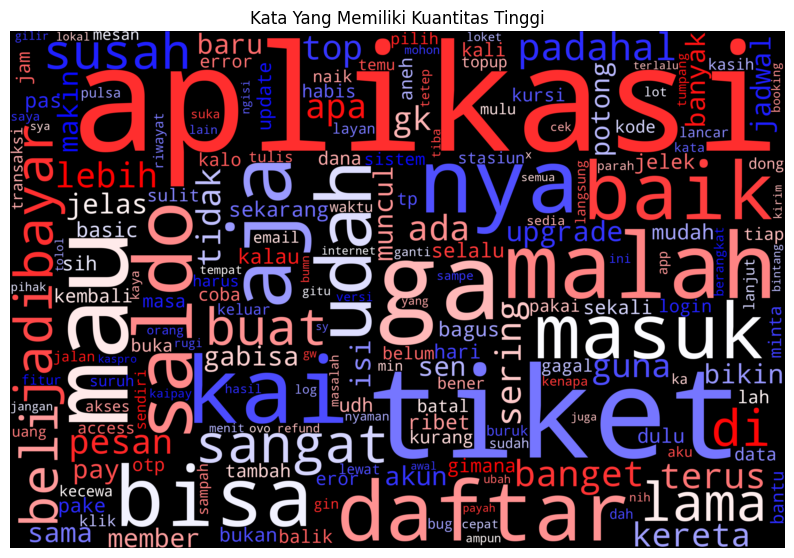

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


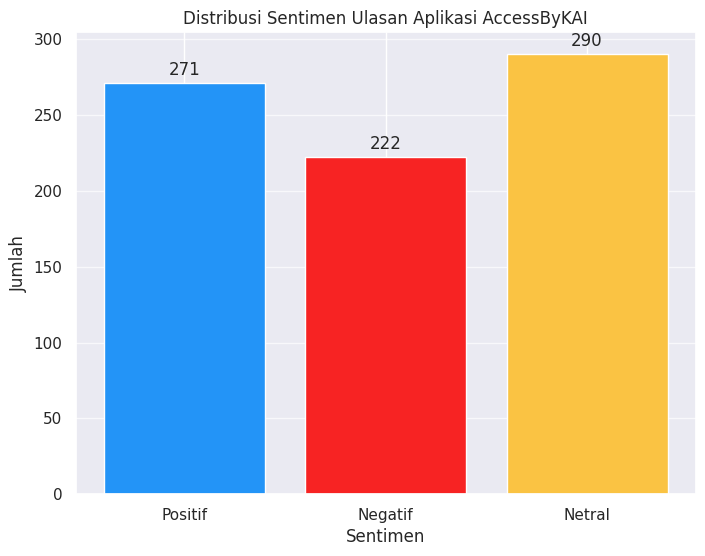

In [41]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi AccessByKAI")


In [42]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
1,mantap,Steady.,Positif
4,ngisi saldo sini uda kena admin e wallet tp sa...,Fill up the balance here uda got admin e walle...,Negatif
5,mau sen tiket selalu muncul tulis cant booking...,Want a penny ticket always comes up write the ...,Positif
6,sangat buruk sudah alami x transaksi gagal pes...,It's very bad. x transactions fail the message...,Negatif
7,bayar pakai ovo bisa klik di baik dulu,Pay up. Use the ovo. Click it good first.,Positif
...,...,...,...
771,beli tiket wajib online kereta tiap hari telat...,Buy a mandatory online train ticket every day....,Positif
772,gk dulumau sen aja banyak error nyasekali nya ...,Don't even want a penny. A lot of errors autom...,Negatif
776,settingan operator kreta ekonomi jurus luar ko...,Set up an economic creet operator. The out-of-...,Positif
778,kembali uang batal sangat lama kocak sekali da...,Back money's off. A long time. Funny.,Positif


In [43]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
1,mantap,Steady.,1
4,ngisi saldo sini uda kena admin e wallet tp sa...,Fill up the balance here uda got admin e walle...,0
5,mau sen tiket selalu muncul tulis cant booking...,Want a penny ticket always comes up write the ...,1
6,sangat buruk sudah alami x transaksi gagal pes...,It's very bad. x transactions fail the message...,0
7,bayar pakai ovo bisa klik di baik dulu,Pay up. Use the ovo. Click it good first.,1
...,...,...,...
771,beli tiket wajib online kereta tiap hari telat...,Buy a mandatory online train ticket every day....,1
772,gk dulumau sen aja banyak error nyasekali nya ...,Don't even want a penny. A lot of errors autom...,0
776,settingan operator kreta ekonomi jurus luar ko...,Set up an economic creet operator. The out-of-...,1
778,kembali uang batal sangat lama kocak sekali da...,Back money's off. A long time. Funny.,1


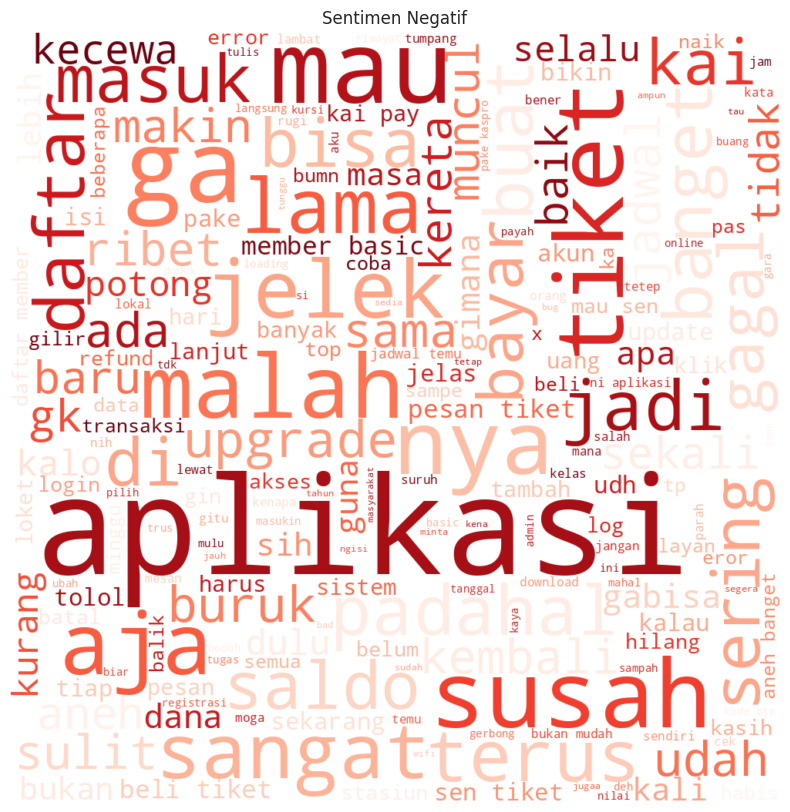

In [44]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

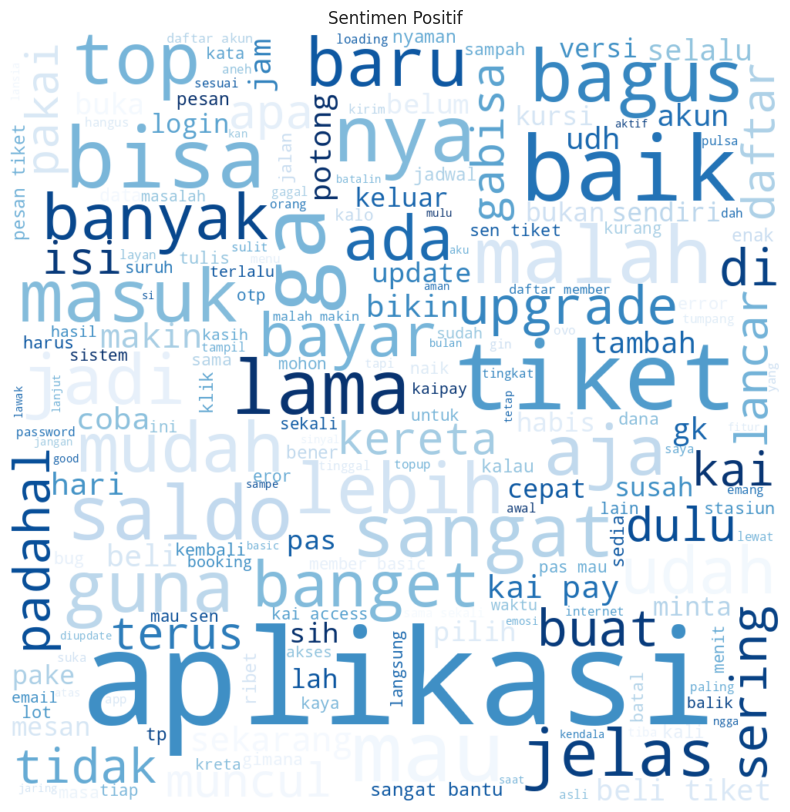

In [45]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [46]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    271
0    222
Name: count, dtype: int64

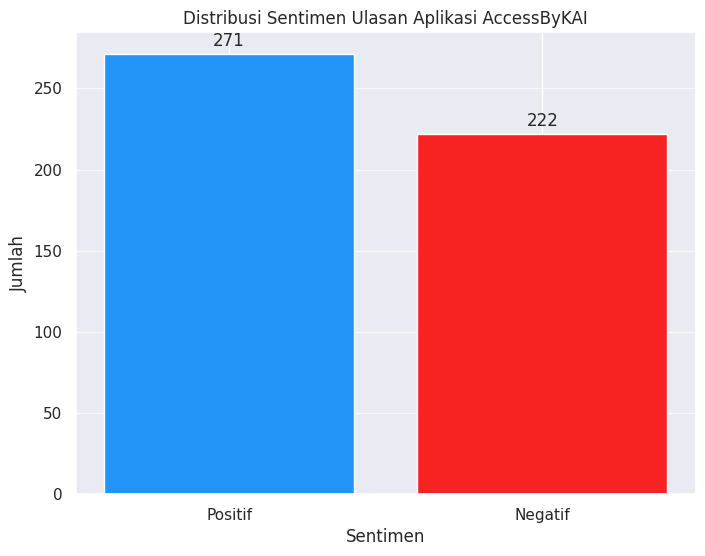

In [47]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi AccessByKAI")

# **Data Preparation**

In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [51]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

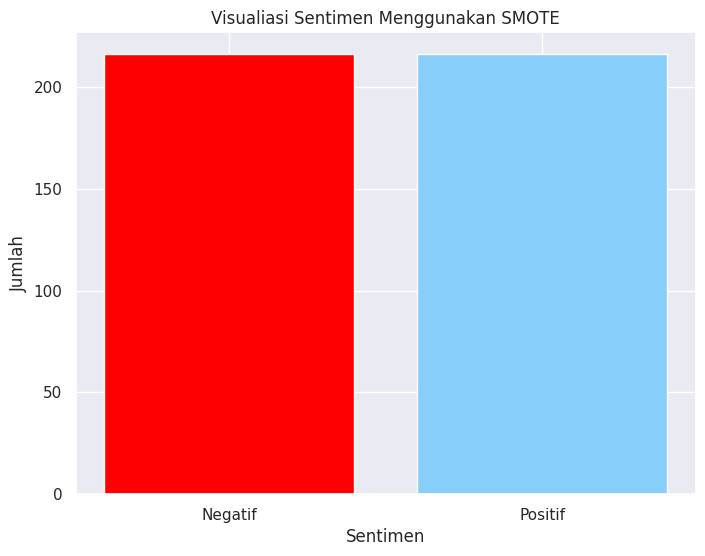

In [52]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [53]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [54]:
y_pred = naive_bayes.predict(X_test_vec)

In [55]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.6363636363636364

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.58      0.66      0.62        44
     Positif       0.69      0.62      0.65        55

    accuracy                           0.64        99
   macro avg       0.64      0.64      0.64        99
weighted avg       0.64      0.64      0.64        99



In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[29 15]
 [21 34]]

True Positives (TP) =  29

True Negatives (TN) =  34

False Positives (FP) =  15

False Negatives (FN) =  21

Accuracy =  0.6363636363636364


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

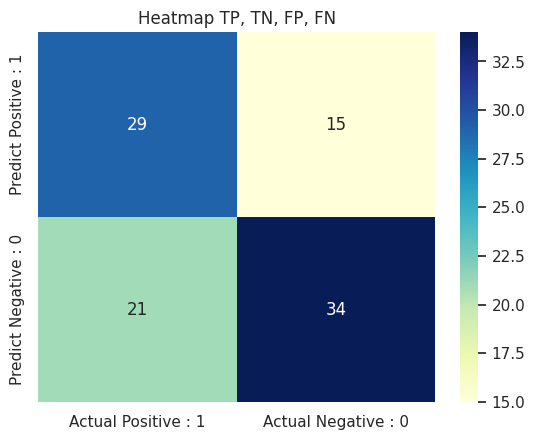

In [57]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [58]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [59]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.6364


In [60]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3636


# **Testing**


In [61]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : kecewa, error terus
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [62]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : sangat berguna, mantap
Hasil Analisis Sentimen Untuk Teks Baru : Positif
